In [47]:
import pandas as pd
import numpy as np

In [3]:
service_request_data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/tmp/ipykernel_79365/1973611264.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  service_request_data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [4]:
# shape of dataset
service_request_data.shape

(300698, 53)

In [5]:
service_request_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
total_missing_values = service_request_data.isnull().sum()  #missing value count, column-wise

In [7]:
print(total_missing_values)

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [8]:
# drop al lthe columns that are completly empty i.e. where number of missing values for the respective column 
# is equals to the total number of rows (300698) or most of the values are blank
service_request_data_ = service_request_data.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough',
                                                   'Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
                                                   'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction',
                                                   'Ferry Terminal Name','Intersection Street 1','Intersection Street 2','Landmark'],axis=1)

In [9]:
service_request_data_.shape

(300698, 39)

In [10]:
service_request_data_.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [11]:
service_request_data_.iloc[350:355,1:3]

,Created Date,Closed Date
350,12/31/2015 03:51:26 PM,12/31/2015 05:09:16 PM
351,12/31/2015 03:49:59 PM,12/31/2015 04:44:33 PM
352,12/31/2015 03:48:48 PM,12/31/2015 06:29:58 PM
353,12/31/2015 03:48:11 PM,12/31/2015 05:49:14 PM
354,12/31/2015 03:47:58 PM,12/31/2015 04:16:37 PM


In [12]:
service_request_data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [13]:
# since the date columns are object, first converting them to datetime
service_request_data_['Created Date'] = pd.to_datetime(service_request_data_['Created Date'])
service_request_data_['Closed Date'] = pd.to_datetime(service_request_data_['Closed Date'])

In [14]:
service_request_data_['Created Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 300698 entries, 0 to 300697
Series name: Created Date
Non-Null Count   Dtype         
--------------   -----         
300698 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.3 MB


In [15]:
service_request_data_['Closed Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 300698 entries, 0 to 300697
Series name: Closed Date
Non-Null Count   Dtype         
--------------   -----         
298534 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.3 MB


In [16]:
# change the format for both the date colums
service_request_data_['Created Date F'] = service_request_data_['Created Date'].dt.strftime('%m/%d/%Y %H:%M:%S') 
service_request_data_['Closed Date F'] = service_request_data_['Closed Date'].dt.strftime('%m/%d/%Y %H:%M:%S') 
# convert the new columns to datetime columns
service_request_data_['Created Date F'] = pd.to_datetime(service_request_data_['Created Date F'])
service_request_data_['Closed Date F'] = pd.to_datetime(service_request_data_['Closed Date F'])

In [17]:
service_request_data_.iloc[100:105,39:41]

,Created Date F,Closed Date F
100,2015-12-31 22:27:16,2015-12-31 23:29:23
101,2015-12-31 22:26:08,2016-01-01 00:49:00
102,2015-12-31 22:26:03,2015-12-31 22:58:51
103,2015-12-31 22:25:06,2016-01-01 08:26:00
104,2015-12-31 22:24:58,2015-12-31 22:31:56


In [17]:
#result =  service_request_data_.loc[service_request_data_['Created Date F']< service_request_data_['Closed Date F']]
#service_request_data_['Closed Date F'].info()
service_request_data_['DateDiff'] = service_request_data_['Closed Date F'] - service_request_data_['Created Date F']

In [18]:
service_request_data_.iloc[100:105,39:42]

,Created Date F,Closed Date F,DateDiff
100,2015-12-31 22:27:16,2015-12-31 23:29:23,0 days 01:02:07
101,2015-12-31 22:26:08,2016-01-01 00:49:00,0 days 02:22:52
102,2015-12-31 22:26:03,2015-12-31 22:58:51,0 days 00:32:48
103,2015-12-31 22:25:06,2016-01-01 08:26:00,0 days 10:00:54
104,2015-12-31 22:24:58,2015-12-31 22:31:56,0 days 00:06:58


In [30]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Frequency Plot for City-wise Complaints'}>

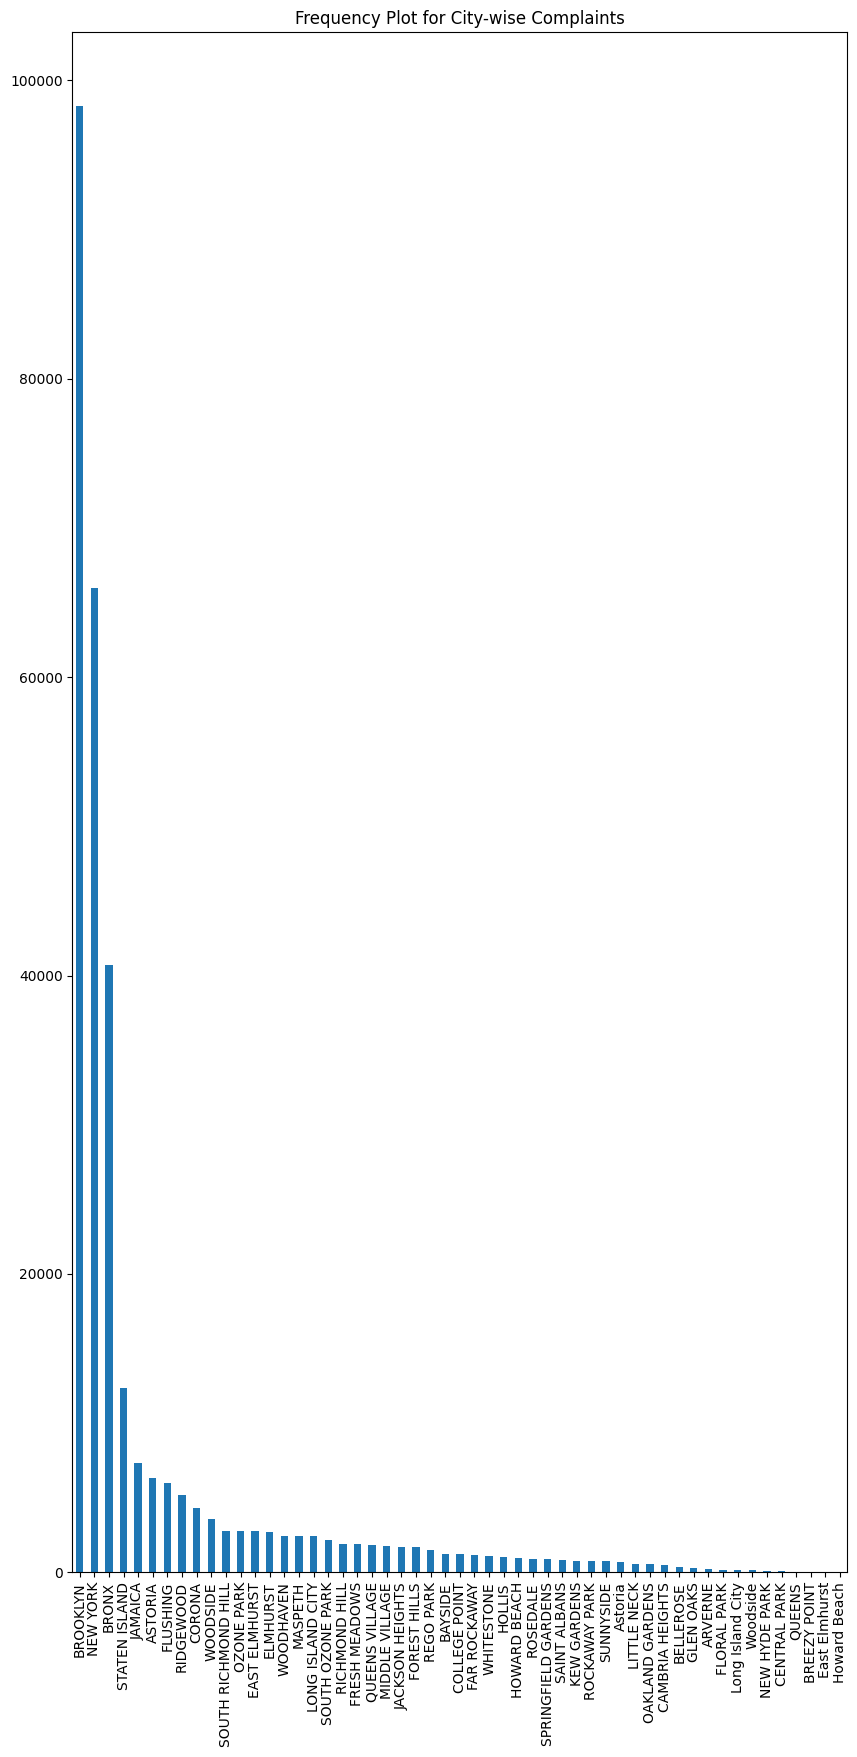

In [32]:
# Frequency Plot for City-wise Complaints
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,20)
plt.title("Frequency Plot for City-wise Complaints")
service_request_data_['City'].value_counts().plot(ax=ax, kind='bar')

In [26]:
# scatter and hexbin plots for complaint concentration accross Brooklyn
df_complaints_brooklyn = service_request_data_[service_request_data_['City'] == 'BROOKLYN']


<AxesSubplot:title={'center':'Scatter Plot for complaint concentration accross Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

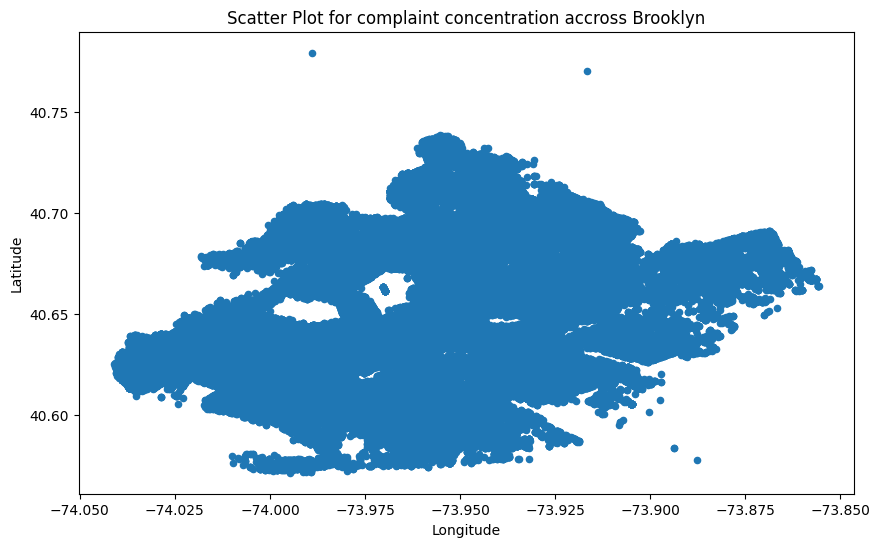

In [30]:
df_complaints_brooklyn.plot(x='Longitude', y='Latitude', kind='scatter', figsize=(10,6), title="Scatter Plot for complaint concentration accross Brooklyn")

(-74.05024967970374, -73.84649669029626, 40.561126849, 40.789798391)

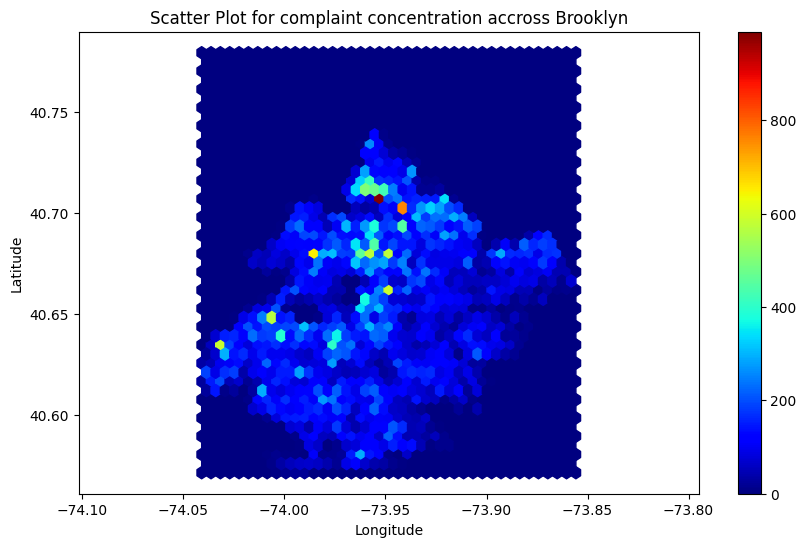

In [36]:
df_complaints_brooklyn.plot(x='Longitude', y='Latitude', kind='hexbin',  gridsize=40,colormap = 'jet', figsize=(10,6), title="Scatter Plot for complaint concentration accross Brooklyn").axis('equal')

<AxesSubplot:title={'center':'Count vs. Complaints'}>

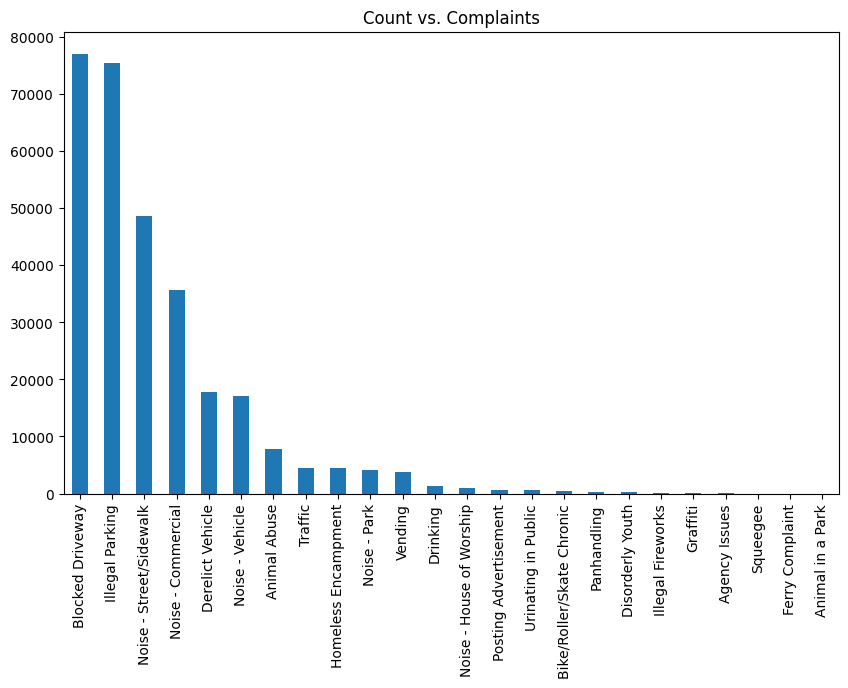

In [33]:
# Count vs. complaints
service_request_data_['Complaint Type'].value_counts().plot(kind='bar',
                    figsize=(10,6), title = 'Count vs. Complaints')

<AxesSubplot:title={'center':'Top 10 Complaints'}>

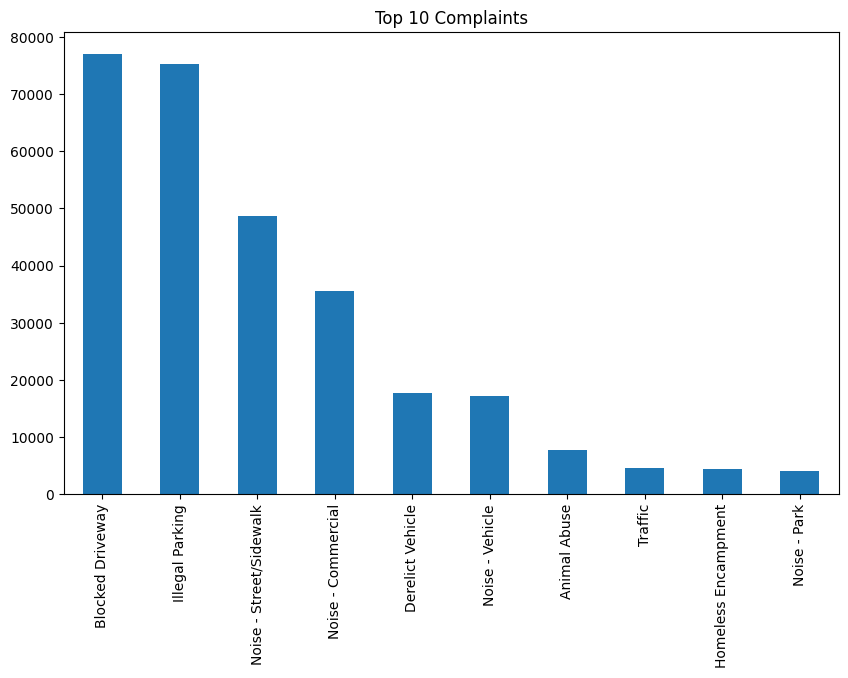

In [35]:
# Top 10 types of complaints
service_request_data_['Complaint Type'].value_counts().head(10).plot(kind='bar',
                    figsize=(10,6), title = 'Top 10 Complaints')

In [20]:
city_complaints = service_request_data_.groupby("City")["Complaint Type"].value_counts()

In [21]:
print("Types of complaints in each city:\n\n",city_complaints.head(50))

Types of complaints in each city:

 City     Complaint Type           
ARVERNE  Illegal Parking                58
         Animal Abuse                   38
         Blocked Driveway               35
         Noise - Street/Sidewalk        29
         Derelict Vehicle               27
         Noise - House of Worship       11
         Noise - Vehicle                 7
         Homeless Encampment             4
         Disorderly Youth                2
         Noise - Commercial              2
         Noise - Park                    2
         Drinking                        1
         Graffiti                        1
         Panhandling                     1
         Urinating in Public             1
         Vending                         1
ASTORIA  Blocked Driveway             2618
         Noise - Commercial           1293
         Illegal Parking              1068
         Noise - Street/Sidewalk       386
         Derelict Vehicle              351
         Noise - Vehicle  

In [24]:
# Adding a new column to the dataset 'Resolution_Time', the difference between Closed Date and Created date 
service_request_data_['Resolution_Time'] = (service_request_data_['Closed Date'] - service_request_data_['Created Date']).dt.days

<AxesSubplot:title={'center':'Avg Response Time of Complaints'}, xlabel='Complaint Type'>

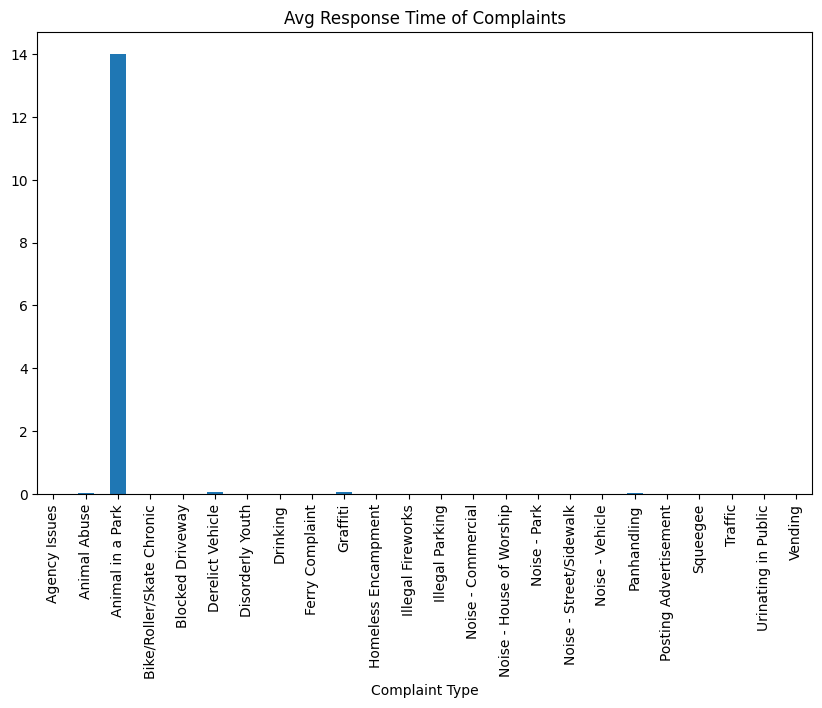

In [45]:
service_request_data_.groupby('Complaint Type').Resolution_Time.mean().plot(kind='bar',
                    figsize=(10,6), title = 'Avg Response Time of Complaints')